In [1]:
from pyopenms import *

In [2]:
exp = MSExperiment()
MzMLFile().load("F45.mzML", exp)
# Get first spectrum
spectra = exp.getSpectra()
observed_spectrum = spectra[0]
mz,inti,Rt=[],[],[]
for i in range(0,11):
    mz.append(spectra[i].get_peaks()[0])
    inti.append(spectra[i].get_peaks()[0])
    Rt.append(spectra[i].get_peaks()[0])
    

In [3]:
dig = ProteaseDigestion()
dig.getEnzymeName()
NOTC1 = "".join([l.strip() for l in open("NOTC1.fasta").readlines()[1:]])
NOTC1 = AASequence.fromString(NOTC1)
# create all digestion products
result = []
dig.digest(NOTC1, result)
print(result[4].toString())
len(result)

CQDPNPCLSTPCK


156

In [4]:
dig.digest(NOTC1, result, 4,40)
# print the results
for s in result:
    print(s.toString())

MPPLLAPLLCLALLPALAAR
CSQPGETCLNGGK
CEAANGTEACVCGGAFVGPR
CQDPNPCLSTPCK
NAGTCHVVDR
GVADYACSCALGFSGPLCLTPLDNACLTNPCR
NGGTCDLLTLTEYK
CPPGWSGK
SCQQADPCASNPCANGGQCLPFEASYICHCPPSFHGPTCR
QDVNECGQKPGLCR
HGGTCHNEVGSYR
CVCR
NGGACVDGVNTYNCR
VASFYCECPHGR
TGLLCHLNDACISNPCNEGSNCDTNPVNGK
AICTCPSGYTGPACSQDVDECSLGANPCEHAGK
CINTLGSFECQCLQGYTGPR
CLDK
INEFQCECPTGFTGHLCQYDVDECASTPCK
NGAK
CLDGPNTYTCVCTEGYTGTHCEVDIDECDPDPCHYGSCK
DGVATFTCLCRPGYTGHHCETNINECSSQPCR
HGGTCQDR
DNAYLCFCLK
GTTGPNCEINLDDCASSPCDSGTCLDK
CPEGYHDPTCLSEVNECNSNPCVHGACR
DSLNGYK
CDCDPGWSGTNCDINNNECESNPCVNGGTCK
DMTSGYVCTCR
EGFSGPNCQTNINECASNPCLNQGTCIDDVAGYK
CNCLLPYTGATCEVVLAPCAPSPCR
NGGECR
QSEDYESFSCVCPTGWQGQTCEVDINECVLSPCR
HGASCQNTHGGYR
CHCQAGYSGR
NCETDIDDCRPNPCHNGGSCTDGINTAFCDCLPGFR
GTFCEEDINECASDPCR
CTCPQGYTGPNCQNLVHWCDSSPCK
NGGK
CWQTHTQYR
CECPSGWTGLYCDVPSVSCEVAAQR
QGVDVAR
LCQHGGLCVDAGNTHHCR
CQAGYTGSYCEDLVDECSPSPCQNGATCTDYLGGYSCK
CVAGYHGVNCSEEIDECLSHPCQNGGTCLDLPNTYK
CSCPR
GTQGVHCEINVDDCNPPVDPVSR
CFNNGTCVDQVGGYSCTCPPGFVGER
CEGDVNECLSNPCDAR
GT

In [5]:
from collections import Counter
peptides = [AASequence.fromString(s.toString()) for s in result]
mass_of_peptides={}
for peptide in peptides:
    mass_of_peptides[peptide.toString()]=peptide.getMonoWeight()

In [6]:
import pandas as pd 
df = pd.DataFrame(list(mass_of_peptides.items()), columns = ['peptide', 'Mass'])
df

,peptide,Mass
0,MPPLLAPLLCLALLPALAAR,2056.230489
1,CSQPGETCLNGGK,1292.548928
2,CEAANGTEACVCGGAFVGPR,1910.807347
3,CQDPNPCLSTPCK,1404.583599
4,NAGTCHVVDR,1070.492732
...,...,...
105,GLACGSK,634.310849
106,SQDGK,533.244544
107,LAFETGPPR,986.518535
108,LQSGMVPNQYNPLR,1615.814068


In [7]:
Counter(mass_of_peptides.values())

Counter({2056.2304888511003: 1,
         1292.5489281395999: 1,
         1910.8073470817997: 1,
         1404.5835991248: 1,
         1070.4927319629999: 1,
         3244.4483835722995: 1,
         1526.7286681113999: 1,
         830.3745124525999: 1,
         4195.6984413402: 1,
         1545.7028037457: 1,
         1415.6000524415: 1,
         479.1984605127: 1,
         1541.6351184905: 1,
         1367.5750821714998: 1,
         3102.3263552681: 1,
         3283.3348722214005: 1,
         2188.9703907836: 1,
         477.2257218465: 1,
         3337.3494592852: 1,
         388.20703489320005: 1,
         4242.602598244501: 1,
         3498.4632006360994: 1,
         872.3559033888: 1,
         1188.5307570119999: 1,
         2715.0768483430006: 1,
         3033.1932315196004: 1,
         795.3762876906999: 1,
         3248.1668214090996: 1,
         1234.4780706782: 1,
         3561.4905230656: 1,
         2580.1667252963002: 1,
         634.2493119421999: 1,
         3811.55688924

In [8]:
names = []
ProteaseDB().getAllNames(names)
len(names) 

33

In [9]:
from pyopenms import *

tsg = TheoreticalSpectrumGenerator()
spec1 = MSSpectrum()
peptide = AASequence.fromString("GLACGSK")
# standard behavior is adding b- and y-ions of charge 1
p = Param()
p.setValue("add_b_ions", "false")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1

# Iterate over annotated ions and their masses
print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
    print(ion.decode(), "is generated at m/z", peak.getMZ())

Spectrum 1 of GLACGSK has 6 peaks.
y1+ is generated at m/z 147.112804913371
y2+ is generated at m/z 234.14483407287105
y3+ is generated at m/z 291.166298168571
y4+ is generated at m/z 394.175483058071
y5+ is generated at m/z 465.212597217571
y6+ is generated at m/z 578.2966615684709


Text(0, 0.5, 'intensity')

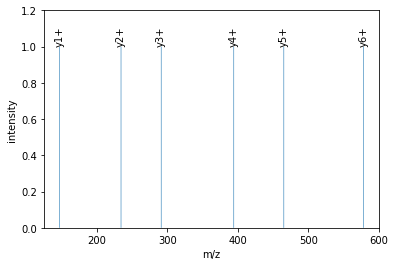

In [10]:
import matplotlib.pyplot as plt
mz,i = spec1.get_peaks()
annot = spec1.getStringDataArrays()[0]
bars = plt.bar(mz, i, snap=False) # snap ensures that all bars are rendered
idx = 0
for rect in bars:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, annot[idx].decode(), ha='center', va='bottom', rotation=90)
    idx += 1
plt.ylim(top=1.2)
plt.xlabel("m/z")
plt.ylabel("intensity")

In [11]:
dig = ProteaseDigestion()
dig.getEnzymeName()
NOTC1 = "".join([l.strip() for l in open("NOTC1.fasta").readlines()[1:]])
NOTC1 = AASequence.fromString(NOTC1)
# create all digestion products
result = []
dig.digest(NOTC1, result)
peptides = [AASequence.fromString(s.toString()) for s in result]

# Iterate over annotated ions and their masses
for peptide in peptides:
    tsg = TheoreticalSpectrumGenerator()
    spec1 = MSSpectrum()

    # standard behavior is adding b- and y-ions of charge 1
    p = Param()
    p.setValue("add_b_ions", "false")
    p.setValue("add_metainfo", "true")
    tsg.setParameters(p)
    tsg.getSpectrum(spec1, peptide, 1, 1) # charge range 1:1
    print("Spectrum 1 of", peptide, "has", spec1.size(), "peaks.")
    for ion, peak in zip(spec1.getStringDataArrays()[0], spec1):
        print(ion.decode(), "is generated at m/z", peak.getMZ(),peak.getIntensity())

Spectrum 1 of MPPLLAPLLCLALLPALAAR has 19 peaks.
y1+ is generated at m/z 175.118952913371 1.0
y2+ is generated at m/z 246.156067072871 1.0
y3+ is generated at m/z 317.19318123237105 1.0
y4+ is generated at m/z 430.27724558327105 1.0
y5+ is generated at m/z 501.31435974277105 1.0
y6+ is generated at m/z 598.367123966071 1.0
y7+ is generated at m/z 711.451188316971 1.0
y8+ is generated at m/z 824.535252667871 1.0
y9+ is generated at m/z 895.572366827371 1.0
y10+ is generated at m/z 1008.656431178271 1.0
y11+ is generated at m/z 1111.665616067771 1.0
y12+ is generated at m/z 1224.749680418671 1.0
y13+ is generated at m/z 1337.833744769571 1.0
y14+ is generated at m/z 1434.886508992871 1.0
y15+ is generated at m/z 1505.9236231523712 1.0
y16+ is generated at m/z 1619.0076875032712 1.0
y17+ is generated at m/z 1732.0917518541712 1.0
y18+ is generated at m/z 1829.1445160774713 1.0
y19+ is generated at m/z 1926.1972803007714 1.0
Spectrum 1 of GPR has 2 peaks.
y1+ is generated at m/z 175.118952

In [12]:
for i in range(len(observed_spectrum.get_peaks()[1])):
    if observed_spectrum.get_peaks()[1][i]>0.0:
        print(observed_spectrum.get_peaks()[1][i],observed_spectrum.get_peaks()[0][i])



1456.2313 350.81201171875
1865.9601 351.2082824707031
11558.034 352.22900390625
1556.9869 352.910400390625
281867.44 355.07073974609375
88551.375 356.0705261230469
7422.0146 357.0497131347656
46201.027 357.0668029785156
4943.916 357.23907470703125
12232.779 358.0672607421875
973.4291 358.25799560546875
21202.037 359.02935791015625
2640.858 359.0651550292969
5069.4775 360.0296630859375
2784.6335 360.2449951171875
2453.9973 361.02557373046875
1284.6594 361.22216796875
2309.285 362.2251281738281
24122.969 363.2085266113281
1739.5857 364.21185302734375
2101.2112 365.22442626953125
1277.0897 365.8205871582031
1154.713 366.19140625
1619.9694 366.8064880371094
1313.3125 366.8260192871094
12830.947 369.1235656738281
1259.9878 370.88616943359375
1887.3196 371.0749206542969
497943.94 371.1021728515625
2301.5552 371.1901550292969
54174.742 371.31646728515625
1477.4009 371.3527526855469
1026.5962 371.8376159667969
138808.03 372.1023864746094
12471.155 372.3196105957031
2811.6687 372.8843994140625


In [52]:
protein_ids = []
peptide_ids = []
hits = []
MZs = []
INts = []
RTs=[]
c = 0
SimpleSearchEngineAlgorithm().search("F46.mzML", "NOTC1.fasta", protein_ids, peptide_ids)
for peptide_id in peptide_ids:
  # Peptide identification values
    print(35*"=")
    print("Peptide ID m/z:", peptide_id.getMZ())   
    print("Peptide ID rt:", peptide_id.getRT())
    print("Peptide scan index:", peptide_id.getMetaValue("scan_index"))
    
    
    INts.append(spectra[peptide_id.getMetaValue("scan_index")].get_peaks()[1])
    MZs.append(spectra[peptide_id.getMetaValue("scan_index")].get_peaks()[0])
    RTs.append((spectra[peptide_id.getMetaValue("scan_index")].getRT())*MZs[c])
    c+=1
    
    print("Peptide scan name:", peptide_id.getMetaValue("scan_index"))
    print("Peptide ID score type:", peptide_id.getScoreType())
  # PeptideHits
    for hit in peptide_id.getHits():
        print(" - Peptide hit rank:", hit.getRank())
        print(" - Peptide hit charge:", hit.getCharge())
        print(" - Peptide hit sequence:", hit.getSequence())
        hits.append(hit.getSequence())
        mz = hit.getSequence().getMonoWeight(Residue.ResidueType.Full, hit.getCharge()) / hit.getCharge()
        print(" - Peptide hit monoisotopic m/z:", mz)
        print(" - Peptide ppm error:", abs(mz - peptide_id.getMZ())/mz *10**6 )
        print(" - Peptide hit score:", hit.getScore())

Peptide ID m/z: 481.533813476563
Peptide ID rt: 250.706052
Peptide scan index: 471
Peptide scan name: 471
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 4
 - Peptide hit sequence: LAAGTLVVVVLM(Oxidation)PPEQLR
 - Peptide hit monoisotopic m/z: 481.2840423614711
 - Peptide ppm error: 518.9682040284873
 - Peptide hit score: 0.0625155046582222
Peptide ID m/z: 385.228741992006
Peptide ID rt: 250.814796
Peptide scan index: 474
Peptide scan name: 474
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 5
 - Peptide hit sequence: LAAGTLVVVVLM(Oxidation)PPEQLR
 - Peptide hit monoisotopic m/z: 385.228689182531
 - Peptide ppm error: 0.13708603870061742
 - Peptide hit score: 0.22435498237609863
Peptide ID m/z: 427.054351806641
Peptide ID rt: 255.832182
Peptide scan index: 558
Peptide scan name: 558
Peptide ID score type: hyperscore
 - Peptide hit rank: 1
 - Peptide hit charge: 5
 - Peptide hit sequence: M(Oxidation)PPLLAPLLC(Carbamidometh

In [53]:
RTs

[array([ 39813.74062807,  39816.65857597,  39818.81667774,  39884.67694772,
         39886.83851911,  39904.63418473,  39929.77155993,  39933.95938765,
         39947.39027508,  39998.63998785,  40004.78467956,  40041.6840564 ,
         40043.99482133,  40045.76779562,  40046.9474654 ,  40110.63228552,
         40112.30117129,  40113.69942695,  40116.59655715,  40157.18413686,
         40159.97023932,  40172.4331036 ,  40176.5550086 ,  40228.8109103 ,
         40270.82103299,  40272.01805086,  40328.25360326,  40339.03717291,
         40365.91629585,  40366.60674963,  40368.8654703 ,  40371.77994858,
         40372.60918705,  40397.44470557,  40409.02975674,  40450.85598973,
         40452.46242241,  40479.60870585,  40482.58910685,  40553.0743763 ,
         40562.70256349,  40570.96719119,  40593.93952538,  40595.85475396,
         40609.97262555,  40615.38522808,  40679.52803764,  40707.5139684 ,
         40709.67207017,  40723.92525683,  40728.04716183,  40729.47664404,
         407

In [54]:
for i in range(len(hits)):
    print(hits[i])

LAAGTLVVVVLM(Oxidation)PPEQLR
LAAGTLVVVVLM(Oxidation)PPEQLR
M(Oxidation)PPLLAPLLC(Carbamidomethyl)LALLPALAAR
HGGTC(Carbamidomethyl)QDR
M(Oxidation)HDGTTPLILAAR
M(Oxidation)HDGTTPLILAAR
LLDEYNLVR
EETPLFLAAR
EETPLFLAAR
SALHWAAAVNNVDAAVVLLK
M(Oxidation)HDGTTPLILAAR
EETPLFLAAR
LAAGTLVVVVLMPPEQLR
TPLHAAVSADAQGVFQILIR
MPPLLAPLLC(Carbamidomethyl)LALLPALAAR
LAAGTLVVVVLM(Oxidation)PPEQLR
TGETALHLAAR
MHDGTTPLILAAR
MHHDIVR
LAAGTLVVVVLM(Oxidation)PPEQLR
LLEASADANIQDNMGR
LQSGM(Oxidation)VPNQYNPLR
LAAGTLVVVVLMPPEQLR
MPPLLAPLLC(Carbamidomethyl)LALLPALAAR
GTFC(Carbamidomethyl)EEDINEC(Carbamidomethyl)ASDPC(Carbamidomethyl)R
LQSGMVPNQYNPLR
LQSGMVPNQYNPLR
LC(Carbamidomethyl)QHGGLC(Carbamidomethyl)VDAGNTHHC(Carbamidomethyl)R
MPPLLAPLLC(Carbamidomethyl)LALLPALAAR
GSIVYLEIDNR
MHDGTTPLILAAR
FEEPVVLPDLDDQTDHR
LAAGTLVVVVLM(Oxidation)PPEQLR
M(Oxidation)PPLLAPLLC(Carbamidomethyl)LALLPALAAR
LAAGTLVVVVLMPPEQLR
M(Oxidation)PPLLAPLLC(Carbamidomethyl)LALLPALAAR
LAAGTLVVVVLMPPEQLR
SALHWAAAVNNVDAAVVLLK
FEEPVVLPDLDDQTDH

In [55]:
tsg = TheoreticalSpectrumGenerator()
theo_spectrum = MSSpectrum()
p = tsg.getParameters()
p.setValue("add_y_ions", "true")
p.setValue("add_b_ions", "true")
p.setValue("add_metainfo", "true")
tsg.setParameters(p)
peptide = AASequence.fromString(str(hits[35]))
tsg.getSpectrum(theo_spectrum, peptide, 1, 2)

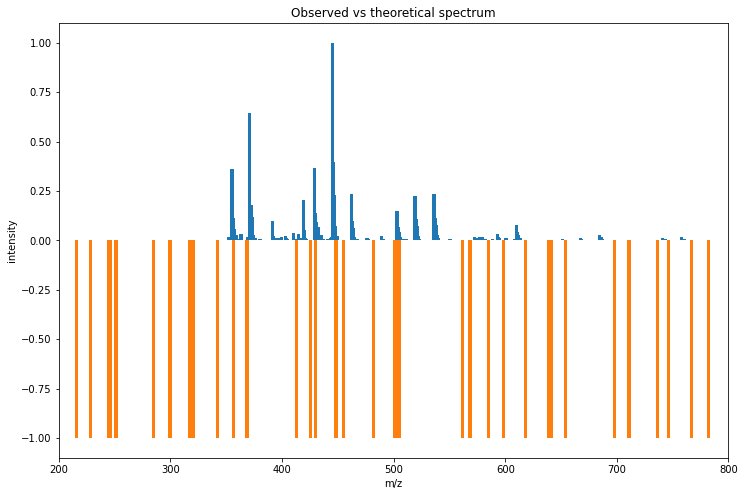

In [56]:
import numpy as np
from matplotlib import pyplot as plt

def mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title):
    obs_int = [element / (max(obs_int)) for element in obs_int] # relative intenstiy
    theo_int = [element * -1 for element in theo_int] # invert the intensity for the mirror plot
    plt.figure(figsize=(12,8))
    plt.bar(obs_mz, obs_int, width = 3.0)
    plt.bar(theo_mz, theo_int, width = 3.0)
    plt.title(title)
    plt.ylabel('intensity')
    plt.xlabel('m/z')
    plt.xlim([200.0,800.0])
# observed = expermintal = mzML
obs_mz, obs_int = observed_spectrum.get_peaks()

#if obs_int.any() == 0:
 #   obs_int = 1

# We filter the peaks of the theoretical spectrum to fit the range (to reduce image complexity)
# theo = Theoritical = FASTA
theo_mz, theo_int = [], []
for mz, intensity in zip(*theo_spectrum.get_peaks()):
    if mz >= 200.0 and mz <= 800.0:
        theo_mz.append(mz)
        theo_int.append(intensity)

title = 'Observed vs theoretical spectrum'
mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

Text(0.5, 0, 'Intensity')

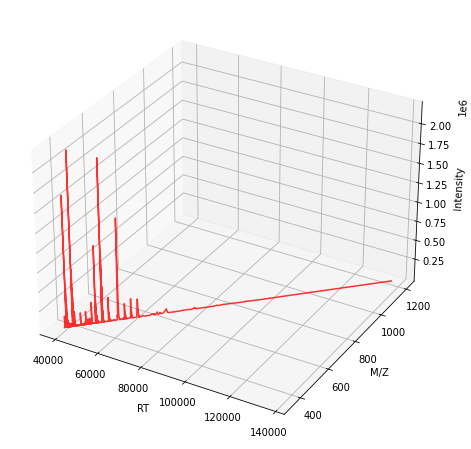

In [57]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
rt = observed_spectrum.getRT()  
RT = [rt]*len(obs_mz)
  
ax.plot(RTs[0],MZs[0], INts[0], zdir='z', color='red',alpha=0.8) 

ax.set_xlabel('RT')
ax.set_ylabel('M/Z')
ax.set_zlabel('Intensity')

Text(0.5, 0, 'Intensity')

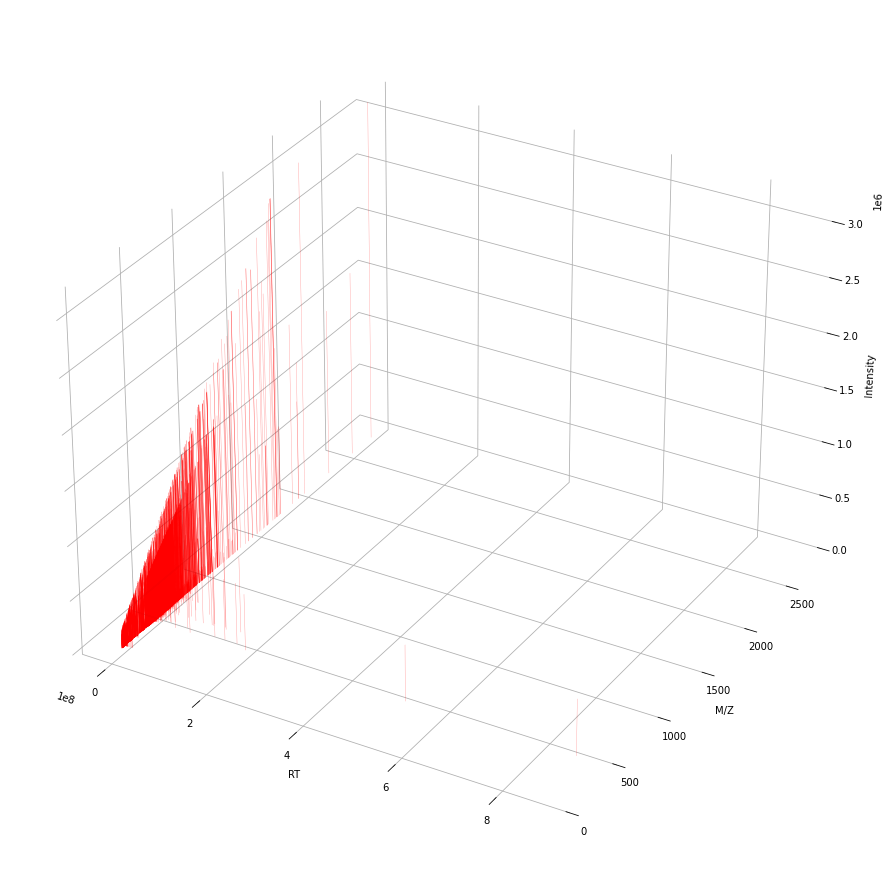

In [58]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(24, 16))
ax = fig.add_subplot(projection='3d')
#for i in range(1):
    #if filtered[i].getMSLevel() == 1:
        #xs = filtered[i].get_peaks()[0]
        #ys = filtered[i].get_peaks()[1]
        #zs = [filtered[i].getRT()]*len(xs)
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

# Get rid of the spines
ax.w_xaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_yaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
ax.w_zaxis.line.set_color((1.0, 1.0, 1.0, 0.0))
for i in range(len(MZs)):   
    ax.bar(MZs[i],RTs[i],INts[i], zdir='x', color=['red'],alpha=0.4,width=4)    
    #ax.plot(RTs[i],MZs[i], INts[i], zdir='z', color='red',alpha=0.8)     
        
ax.set_xlabel("RT")
ax.set_ylabel('M/Z')
ax.set_zlabel('Intensity')

In [19]:
alignment = []
spa = SpectrumAlignment()
p = spa.getParameters()
p.setValue("tolerance", 1.0)
p.setValue("is_relative_tolerance", "false")
spa.setParameters(p)
print(max(observed_spectrum.get_peaks()[1]))
# align both spectra
spa.getSpectrumAlignment(alignment, theo_spectrum, observed_spectrum)

775471.3


In [20]:
print("Number of matched peaks: " + str(len(alignment)))
print("ion\ttheo. m/z\tobserved m/z")

for theo_idx, obs_idx in alignment:
    ion_name = theo_spectrum.getStringDataArrays()[0][theo_idx].decode()
    ion_charge = theo_spectrum.getIntegerDataArrays()[0][theo_idx]
    print(ion_name + "\t" + str(ion_charge) + "\t"
      + str(theo_spectrum[theo_idx].getMZ())+"\t"+str(theo_spectrum[theo_idx].getIntensity())
      + "\t" + str(observed_spectrum[obs_idx].getMZ())+"\t"+str(observed_spectrum[obs_idx].getIntensity()))

Number of matched peaks: 9
ion	theo. m/z	observed m/z
b4+	1	353.156796104771	1.0	352.910400390625	1556.9869384765625
y6++	2	368.655772049521	1.0	369.1235656738281	12830.947265625
b7++	2	378.640121985721	1.0	378.21923828125	1969.807861328125
y7++	2	397.166504097371	1.0	397.2485046386719	1376.430419921875
y3+	1	418.20447532807106	1.0	418.0356750488281	1905.1322021484375
b5+	1	513.187445089971	1.0	512.7837524414062	1514.231201171875
y4+	1	578.235124313271	1.0	578.12841796875	5624.0849609375
y6+	1	736.3042676322709	1.0	736.624755859375	1698.036376953125
y7+	1	793.325731727971	1.0	793.671630859375	1770.4661865234375


14 3
15 25
16 50
17 70
18 98
19 193
20 235
23 296
25 311


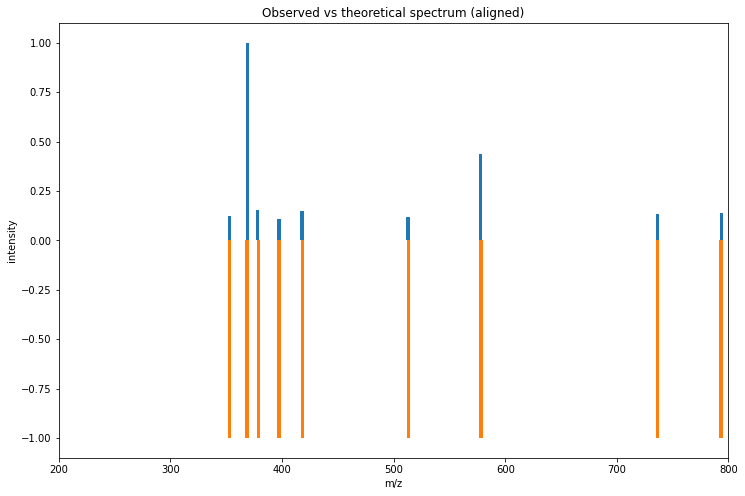

In [21]:
theo_mz, theo_int, obs_mz, obs_int = [], [], [], []
for theo_idx, obs_idx in alignment:
    theo_mz.append(theo_spectrum[theo_idx].getMZ())
    theo_int.append(theo_spectrum[theo_idx].getIntensity())
    obs_mz.append(observed_spectrum[obs_idx].getMZ())
    obs_int.append(observed_spectrum[obs_idx].getIntensity())
    print(theo_idx, obs_idx)
title = 'Observed vs theoretical spectrum (aligned)'

for i in range(len(obs_int)):
    if obs_int[i] == 0.0:
        obs_int[i] = -0.001

mirror_plot(obs_mz, obs_int, theo_mz, theo_int, title)

Text(0.5, 0, 'RT')

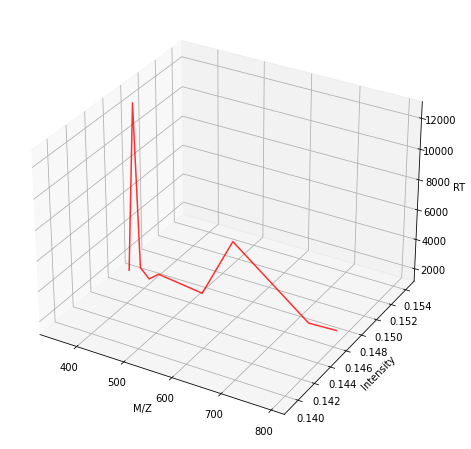

In [22]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(projection='3d')
        
z = [rt]*len(obs_mz)
  
ax.plot(obs_mz, obs_int,z, zdir='y', color='red',alpha=0.8) 

ax.set_xlabel('M/Z')
ax.set_ylabel('Intensity')
ax.set_zlabel('RT')